# Data Science Salaries Prediction
...

## Data

In [384]:
import pandas as pd

data = pd.read_csv('../data/salaries.csv')
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
151440,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
151441,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
151442,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
151443,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [385]:
PPP = pd.read_csv('../data/PPP.csv')[['Country Name', 'Country Code', '2020', '2021', '2022', '2023', '2024']]
PPP.head()

,Country Name,Country Code,2020,2021,2022,2023,2024
0,Aruba,ABW,1.555178,1.513444,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,15.787193,15.989781,16.835042,15.418429,13.988048
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,171.145370,203.688736,228.870971,249.815123,311.185651


Considering we have data for salaries for 2025, but no PPP for 2025, we simply used the PPP value of the previous year (2024) for the 2025 aswell:

In [386]:
PPP['2025'] = PPP['2024']
PPP.head()

,Country Name,Country Code,2020,2021,2022,2023,2024,2025
0,Aruba,ABW,1.555178,1.513444,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,15.787193,15.989781,16.835042,15.418429,13.988048,13.988048
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,171.145370,203.688736,228.870971,249.815123,311.185651,311.185651


We then took the PPP dataset to a format similar to the `data` one, so that we can then merge them easily.

In [387]:
# Create one row per year per country in PPP dataset
PPP = PPP.melt(id_vars=['Country Name', 'Country Code'], var_name='work_year', value_name='PPP')
PPP.head()

,Country Name,Country Code,work_year,PPP
0,Aruba,ABW,2020,1.555178
1,Africa Eastern and Southern,AFE,2020,NaN
2,Afghanistan,AFG,2020,15.787193
3,Africa Western and Central,AFW,2020,NaN
4,Angola,AGO,2020,171.145370


## Data Preprocessing

First, we change some names in the categorical variables values:
- we convert all country names from ISO2 to ISO3 using country_converter;
- we extend all experience_level...

In [388]:
!pip install country_converter

In [389]:
import country_converter

data['employee_residence'] = country_converter.convert(names = data['employee_residence'], to = "ISO3")
data['company_location'] = country_converter.convert(names = data['company_location'], to = "ISO3")
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,USA,0,USA,M
1,2025,EX,FT,Head of Data,232344,USD,232344,USA,0,USA,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,USA,0,USA,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,USA,0,USA,M
4,2025,MI,FT,Engineer,160000,USD,160000,USA,100,USA,M
...,...,...,...,...,...,...,...,...,...,...,...
151440,2020,SE,FT,Data Scientist,412000,USD,412000,USA,100,USA,L
151441,2021,MI,FT,Principal Data Scientist,151000,USD,151000,USA,100,USA,L
151442,2020,EN,FT,Data Scientist,105000,USD,105000,USA,100,USA,S
151443,2020,EN,CT,Business Data Analyst,100000,USD,100000,USA,100,USA,L


In [390]:
data['experience_level'] = data['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

data['employment_type'] = data['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
data['company_size'] = data['company_size'].replace({
    'S': 'Small',
    'M': 'Medium',
    'L' : 'Large',
})
data['remote_ratio'] = data['remote_ratio'].astype(str)
data['remote_ratio'] = data['remote_ratio'].replace({
    '0': 'On-Site',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})

We now want to merge with the PPP dataset:

For typing mismatch:

In [391]:
data['work_year'] = data['work_year'].astype(str)

Merge 1: (company_location and Country Code)

In [392]:
data_merged = data.merge(PPP, how='left', left_on=['company_location', 'work_year'], right_on=['Country Code', 'work_year']) \
    .drop(columns=['Country Code']) \
    .rename(columns={'Country Name': 'full_company_location'})
data_merged

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,full_company_location,PPP
0,2025,Executive level,Full-time,Head of Data,348516,USD,348516,USA,On-Site,USA,Medium,United States,1.00000
1,2025,Executive level,Full-time,Head of Data,232344,USD,232344,USA,On-Site,USA,Medium,United States,1.00000
2,2025,Senior,Full-time,Data Scientist,145400,USD,145400,USA,On-Site,USA,Medium,United States,1.00000
3,2025,Senior,Full-time,Data Scientist,81600,USD,81600,USA,On-Site,USA,Medium,United States,1.00000
4,2025,Mid/Intermediate level,Full-time,Engineer,160000,USD,160000,USA,Full-Remote,USA,Medium,United States,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151440,2020,Senior,Full-time,Data Scientist,412000,USD,412000,USA,Full-Remote,USA,Large,United States,1.00000
151441,2021,Mid/Intermediate level,Full-time,Principal Data Scientist,151000,USD,151000,USA,Full-Remote,USA,Large,United States,1.00000
151442,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,USA,Full-Remote,USA,Small,United States,1.00000
151443,2020,Entry level,Contractor,Business Data Analyst,100000,USD,100000,USA,Full-Remote,USA,Large,United States,1.00000


Merge 2: (employee_residence and Country Code)

In [393]:
data_merged.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,full_company_location,PPP
0,2025,Executive level,Full-time,Head of Data,348516,USD,348516,USA,On-Site,USA,Medium,United States,1.0
1,2025,Executive level,Full-time,Head of Data,232344,USD,232344,USA,On-Site,USA,Medium,United States,1.0
2,2025,Senior,Full-time,Data Scientist,145400,USD,145400,USA,On-Site,USA,Medium,United States,1.0
3,2025,Senior,Full-time,Data Scientist,81600,USD,81600,USA,On-Site,USA,Medium,United States,1.0
4,2025,Mid/Intermediate level,Full-time,Engineer,160000,USD,160000,USA,Full-Remote,USA,Medium,United States,1.0


In [394]:
PPP.head()

,Country Name,Country Code,work_year,PPP
0,Aruba,ABW,2020,1.555178
1,Africa Eastern and Southern,AFE,2020,NaN
2,Afghanistan,AFG,2020,15.787193
3,Africa Western and Central,AFW,2020,NaN
4,Angola,AGO,2020,171.145370


In [395]:
data_merged = data_merged.merge(PPP[['Country Code', 'Country Name', 'work_year']], how='left', left_on=['employee_residence', 'work_year'], right_on=['Country Code', 'work_year']) \
    .drop(columns=['Country Code']) \
    .rename(columns={'Country Name': 'full_employee_residence'})
data_merged

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,full_company_location,PPP,full_employee_residence
0,2025,Executive level,Full-time,Head of Data,348516,USD,348516,USA,On-Site,USA,Medium,United States,1.00000,United States
1,2025,Executive level,Full-time,Head of Data,232344,USD,232344,USA,On-Site,USA,Medium,United States,1.00000,United States
2,2025,Senior,Full-time,Data Scientist,145400,USD,145400,USA,On-Site,USA,Medium,United States,1.00000,United States
3,2025,Senior,Full-time,Data Scientist,81600,USD,81600,USA,On-Site,USA,Medium,United States,1.00000,United States
4,2025,Mid/Intermediate level,Full-time,Engineer,160000,USD,160000,USA,Full-Remote,USA,Medium,United States,1.00000,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151440,2020,Senior,Full-time,Data Scientist,412000,USD,412000,USA,Full-Remote,USA,Large,United States,1.00000,United States
151441,2021,Mid/Intermediate level,Full-time,Principal Data Scientist,151000,USD,151000,USA,Full-Remote,USA,Large,United States,1.00000,United States
151442,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,USA,Full-Remote,USA,Small,United States,1.00000,United States
151443,2020,Entry level,Contractor,Business Data Analyst,100000,USD,100000,USA,Full-Remote,USA,Large,United States,1.00000,United States


In [396]:
data_merged.isna().sum()

work_year                    0
experience_level             0
employment_type              0
job_title                    0
salary                       0
salary_currency              0
salary_in_usd                0
employee_residence           0
remote_ratio                 0
company_location             0
company_size                 0
full_company_location       17
PPP                        136
full_employee_residence     18
dtype: int64

Considering we only have around 150 rows with missing values, we chose to drop them.

In [397]:
data_merged = data_merged.dropna()

Here we compute the `adjusted_salary` as the `salary` / `PPP`:

In [398]:
data_merged.loc[:,'adjusted_salary'] = data_merged['salary'] / data_merged['PPP']
data_merged[['salary', 'salary_currency', 'company_location', 'PPP', 'adjusted_salary']]

/tmp/ipykernel_17606/2627125468.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,salary,salary_currency,company_location,PPP,adjusted_salary
0,348516,USD,USA,1.00000,348516.000000
1,232344,USD,USA,1.00000,232344.000000
2,145400,USD,USA,1.00000,145400.000000
3,81600,USD,USA,1.00000,81600.000000
4,160000,USD,USA,1.00000,160000.000000
...,...,...,...,...,...
151440,412000,USD,USA,1.00000,412000.000000
151441,151000,USD,USA,1.00000,151000.000000
151442,105000,USD,USA,1.00000,105000.000000
151443,100000,USD,USA,1.00000,100000.000000


In [399]:
data = data_merged

## Data Exploration

In [400]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151308 entries, 0 to 151444
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   work_year                151308 non-null  object 
 1   experience_level         151308 non-null  object 
 2   employment_type          151308 non-null  object 
 3   job_title                151308 non-null  object 
 4   salary                   151308 non-null  int64  
 5   salary_currency          151308 non-null  object 
 6   salary_in_usd            151308 non-null  int64  
 7   employee_residence       151308 non-null  object 
 8   remote_ratio             151308 non-null  object 
 9   company_location         151308 non-null  object 
 10  company_size             151308 non-null  object 
 11  full_company_location    151308 non-null  object 
 12  PPP                      151308 non-null  float64
 13  full_employee_residence  151308 non-null  object 
 14  adjusted_

In [401]:
data.describe()

,salary,salary_in_usd,PPP,adjusted_salary
count,1.513080e+05,151308.000000,151308.000000,1.513080e+05
mean,1.628147e+05,157599.547836,6.639164,1.577505e+05
std,2.077787e+05,74127.586372,497.228739,8.320566e+04
min,1.400000e+04,15000.000000,0.189314,1.116437e+00
25%,1.060000e+05,106000.000000,1.000000,1.052000e+05
50%,1.470000e+05,146300.000000,1.000000,1.460000e+05
75%,1.990000e+05,198000.000000,1.000000,1.976918e+05
max,3.040000e+07,800000.000000,63798.954426,1.100000e+07


In [402]:
duplicated = data[data.duplicated()]
print(f'Found {duplicated.shape[0]} duplicated rows')

Found 79510 duplicated rows


In [403]:
duplicated

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,full_company_location,PPP,full_employee_residence,adjusted_salary
14,2025,Senior,Full-time,Manager,230000,USD,230000,USA,On-Site,USA,Medium,United States,1.000000,United States,230000.000000
15,2025,Senior,Full-time,Manager,121000,USD,121000,USA,On-Site,USA,Medium,United States,1.000000,United States,121000.000000
16,2025,Senior,Full-time,Manager,230000,USD,230000,USA,On-Site,USA,Medium,United States,1.000000,United States,230000.000000
17,2025,Senior,Full-time,Manager,121000,USD,121000,USA,On-Site,USA,Medium,United States,1.000000,United States,121000.000000
18,2025,Senior,Full-time,Manager,230000,USD,230000,USA,On-Site,USA,Medium,United States,1.000000,United States,230000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151148,2022,Senior,Full-time,Data Engineer,115000,USD,115000,USA,Full-Remote,USA,Medium,United States,1.000000,United States,115000.000000
151233,2021,Mid/Intermediate level,Full-time,Data Scientist,150000,USD,150000,USA,Full-Remote,USA,Medium,United States,1.000000,United States,150000.000000
151287,2021,Mid/Intermediate level,Full-time,Data Engineer,200000,USD,200000,USA,Full-Remote,USA,Large,United States,1.000000,United States,200000.000000
151367,2021,Entry level,Full-time,Data Scientist,90000,USD,90000,USA,Full-Remote,USA,Small,United States,1.000000,United States,90000.000000


In [404]:
data.drop_duplicates()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,full_company_location,PPP,full_employee_residence,adjusted_salary
0,2025,Executive level,Full-time,Head of Data,348516,USD,348516,USA,On-Site,USA,Medium,United States,1.00000,United States,348516.000000
1,2025,Executive level,Full-time,Head of Data,232344,USD,232344,USA,On-Site,USA,Medium,United States,1.00000,United States,232344.000000
2,2025,Senior,Full-time,Data Scientist,145400,USD,145400,USA,On-Site,USA,Medium,United States,1.00000,United States,145400.000000
3,2025,Senior,Full-time,Data Scientist,81600,USD,81600,USA,On-Site,USA,Medium,United States,1.00000,United States,81600.000000
4,2025,Mid/Intermediate level,Full-time,Engineer,160000,USD,160000,USA,Full-Remote,USA,Medium,United States,1.00000,United States,160000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151440,2020,Senior,Full-time,Data Scientist,412000,USD,412000,USA,Full-Remote,USA,Large,United States,1.00000,United States,412000.000000
151441,2021,Mid/Intermediate level,Full-time,Principal Data Scientist,151000,USD,151000,USA,Full-Remote,USA,Large,United States,1.00000,United States,151000.000000
151442,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,USA,Full-Remote,USA,Small,United States,1.00000,United States,105000.000000
151443,2020,Entry level,Contractor,Business Data Analyst,100000,USD,100000,USA,Full-Remote,USA,Large,United States,1.00000,United States,100000.000000


We deciced to keep them in this context.

In [405]:
print('Unique Values per Column')
for col in data.columns:
    print(f'{col} ({data[col].dtype}): {data[col].nunique()}')

Unique Values per Column
work_year (object): 6
experience_level (object): 4
employment_type (object): 4
job_title (object): 421
salary (int64): 12294
salary_currency (object): 25
salary_in_usd (int64): 13561
employee_residence (object): 97
remote_ratio (object): 3
company_location (object): 88
company_size (object): 3
full_company_location (object): 88
PPP (float64): 223
full_employee_residence (object): 97
adjusted_salary (float64): 15840


We check if we can group some job titles:

In [406]:
data['job_title'].value_counts()

job_title
Data Scientist                   18743
Software Engineer                16936
Data Engineer                    16328
Data Analyst                     13746
Engineer                         10994
                                 ...  
AI Solutions Consultant              1
CRM Data Analyst                     1
Quantitative Research Analyst        1
Principal Data Architect             1
Cloud Data Architect                 1
Name: count, Length: 421, dtype: int64

We have a lot of job titles that can potentially be grouped:

In [407]:
import re

def normalize_job_title(title):
    """
    Normalizes a job title string into a key job category.
    The order of checks is important to catch specific roles first.
    """
    title = title.lower()

    # Manager / Lead / Director / Head / Principal
    if re.search(r'manager|lead|head|director|principal|chief|staff|executive', title):
        return 'Manager / Director'
    
    # Machine Learning
    if re.search(r'machine learning|ml', title):
        return 'Machine Learning Engineer'
    
    # AI
    if re.search(r'ai|nlp|natural language|computer vision|deep learning|cv|dl|artificial', title):
        return 'AI Engineer / DL Engineer'
    
    # Software Engineer / Developer
    if re.search(r'software|developer|programmer|cloud|database|system|admin', title):
        return 'Software Engineer / IT'
        
    # Data Scientist
    if re.search(r'scientist|statistician|actuar', title):
        return 'Data Scientist'

    # Data Analyst
    if re.search(r'analyst|bi|business|analytics', title):
        return 'Data Analyst'
    
    # Data Architect
    if 'architect' in title:
        return 'Data Architect'
    
    # Researcher
    if re.search(r'research|doctor|economist', title):
        return 'Research Scientist'

    # Catch-all for other 'Engineer' roles that weren't caught above
    if re.search(r'engineer|governance|data', title):
        return 'Data Engineer' # Group general engineers with Data Engineers
    
    # If none of the above, return a generic category or the original title
    return 'Other'

data['job_title_normalized'] = data['job_title'].apply(normalize_job_title)

/tmp/ipykernel_17606/4133970204.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [408]:
data['job_title'].value_counts()

job_title
Data Scientist                   18743
Software Engineer                16936
Data Engineer                    16328
Data Analyst                     13746
Engineer                         10994
                                 ...  
AI Solutions Consultant              1
CRM Data Analyst                     1
Quantitative Research Analyst        1
Principal Data Architect             1
Cloud Data Architect                 1
Name: count, Length: 421, dtype: int64

In [409]:
data['job_title_normalized'].value_counts()

job_title_normalized
Data Engineer                33716
Data Analyst                 27472
Data Scientist               25112
Software Engineer / IT       22646
Manager / Director           17028
Machine Learning Engineer    10625
Data Architect                4379
Other                         4374
AI Engineer / DL Engineer     3282
Research Scientist            2674
Name: count, dtype: int64

In [410]:
data[data['job_title_normalized'] == 'Data Engineer']['job_title'].value_counts().to_dict()

{'Data Engineer': 16328,
 'Engineer': 10994,
 'Data Specialist': 984,
 'DevOps Engineer': 563,
 'Platform Engineer': 560,
 'Solutions Engineer': 417,
 'Backend Engineer': 385,
 'Data Governance': 360,
 'Data Management Specialist': 271,
 'Full Stack Engineer': 228,
 'Data Modeler': 210,
 'Data Product Owner': 178,
 'Data Strategist': 128,
 'Data Management': 122,
 'Prompt Engineer': 110,
 'Solution Engineer': 110,
 'Data Infrastructure Engineer': 108,
 'Data Governance Specialist': 96,
 'Data Integration Engineer': 94,
 'Data Visualization Engineer': 94,
 'QA Engineer': 93,
 'Robotics Engineer': 89,
 'Data Integration Specialist': 81,
 'Data Operations Engineer': 78,
 'Data Visualization Specialist': 74,
 'Data Analysis': 70,
 'Data Quality Engineer': 69,
 'Data Operations Specialist': 58,
 'Security Engineer': 56,
 'Data Operations': 56,
 'Data Platform Engineer': 54,
 'Encounter Data Management Professional': 50,
 'Automation Engineer': 40,
 'Data and Reporting Professional': 40,
 'S

We got this categorical features:
- work_year;
- experience_level;
- employment_type;
- job_title;
- salary_currency;
- employee_residence;
- remote_ratio;
- company_location;
- company_size;
- full_company_location;
- full_employee_residence;
- job_title_normalized.


We got this continuous features:
- salary;
- salary_in_usd;
- PPP;
- adjusted_salary (target).

### Categorical

Text(0.5, 1.0, 'Countplot of Work Year')

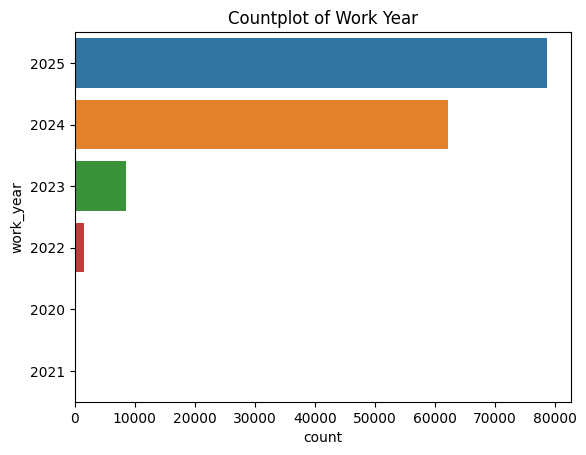

In [411]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = data, y = 'work_year', hue = 'work_year', legend = None)
plt.title('Countplot of Work Year')

It could be a good idea to group 2023 and less.

<Axes: xlabel='count', ylabel='job_title_normalized'>

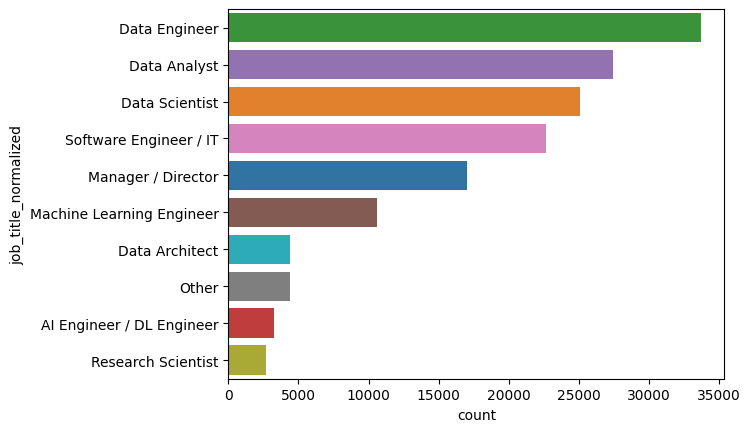

In [412]:
sns.countplot(data = data, y = 'job_title_normalized', hue = 'job_title_normalized', legend = None, order=data['job_title_normalized'].value_counts().index)

Text(0.5, 1.0, 'Countplot of Experience Level')

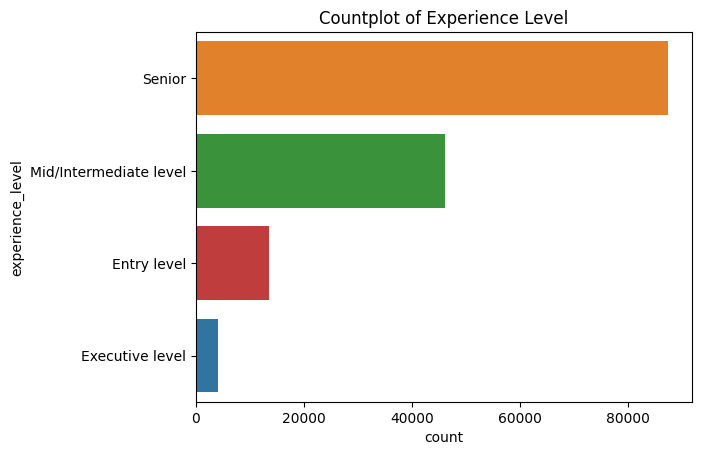

In [413]:
sns.countplot(data = data, y = 'experience_level', hue = 'experience_level', legend = None, order=data['experience_level'].value_counts().index)
plt.title('Countplot of Experience Level')

We plot the top 10 company locations (we decided to exclude USA in this because it is too high).

<Axes: ylabel='full_company_location'>

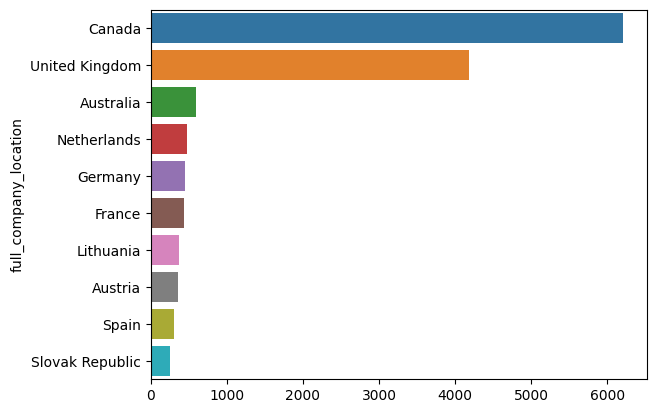

In [414]:
n_top = 10
top_locations = data['full_company_location'].value_counts().iloc[1:n_top+1]
sns.barplot(x = top_locations.values, y = top_locations.index, hue = top_locations.index, legend = None)

Text(0.5, 1.0, 'Countplot of Company Size')

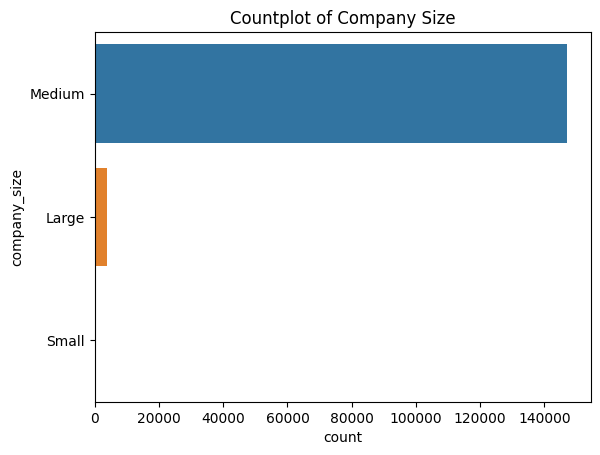

In [415]:
sns.countplot(data = data, y = 'company_size', hue = 'company_size', legend = None, order=data['company_size'].value_counts().index)
plt.title('Countplot of Company Size')

### Numerical

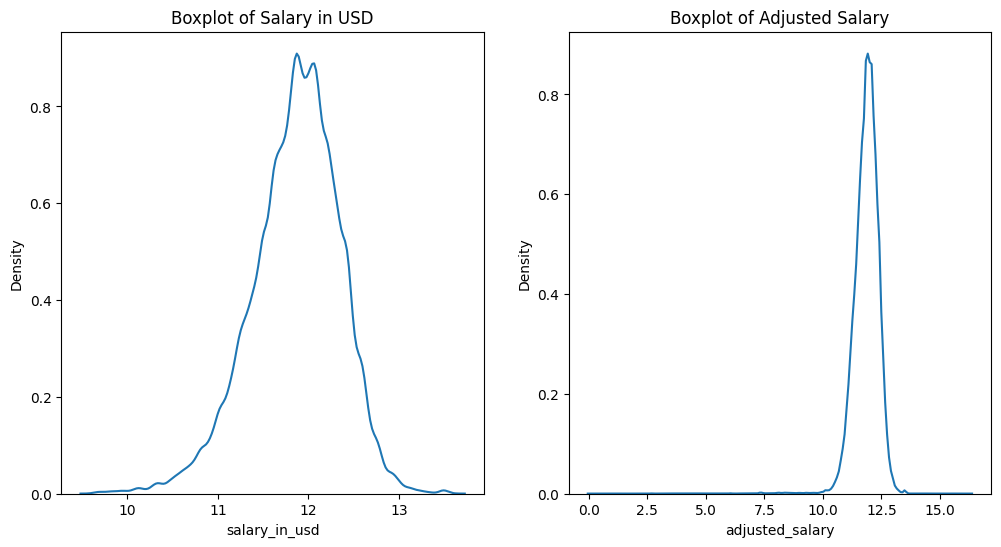

In [416]:
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax = ax.flatten()
sns.kdeplot(x = np.log(data['salary_in_usd']), ax = ax[0])
ax[0].set_title('Boxplot of Salary in USD')
sns.kdeplot(x = np.log(data['adjusted_salary']), ax = ax[1])
#ax.set_xlim([0, 1000000])
ax[1].set_title('Boxplot of Adjusted Salary')
plt.show()

In [417]:
data['log_salary'] = np.log(data['salary_in_usd'])

/tmp/ipykernel_17606/3689201300.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



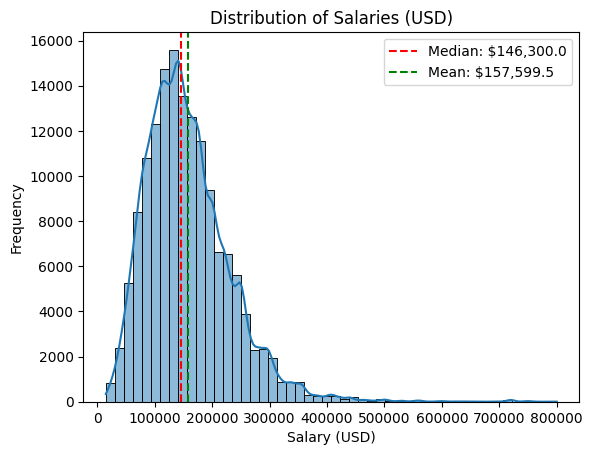

In [418]:
sns.histplot(data['salary_in_usd'], kde=True, bins=50)
plt.title('Distribution of Salaries (USD)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.axvline(data['salary_in_usd'].median(), color='red', linestyle='--', label=f'Median: ${data["salary_in_usd"].median():,}')
plt.axvline(data['salary_in_usd'].mean(), color='green', linestyle='--', label=f'Mean: ${data["salary_in_usd"].mean().round(1):,}')
plt.legend()
plt.show()

### Bivariate

<Axes: xlabel='salary_in_usd', ylabel='experience_level'>

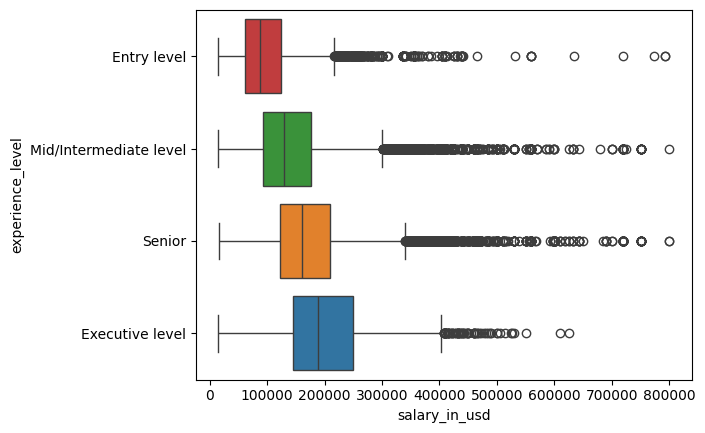

In [426]:
sns.boxplot(y = 'experience_level', x = 'salary_in_usd', data = data, hue = 'experience_level', order=['Entry level', 'Mid/Intermediate level', 'Senior', 'Executive level'])

Experience Level, as expected, seems to have a strong (positive) effect on salary.

<Axes: xlabel='log_salary', ylabel='experience_level'>

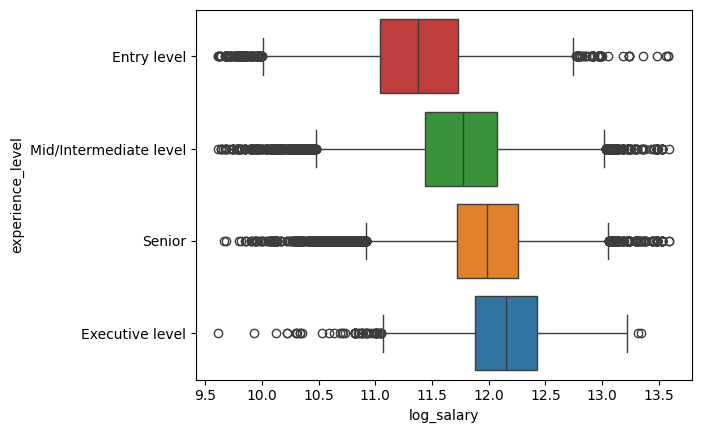

In [420]:
sns.boxplot(y = 'experience_level', x = 'log_salary', data = data, hue = 'experience_level', order=['Entry level', 'Mid/Intermediate level', 'Senior', 'Executive level'])

In [421]:
order = data.groupby('job_title_normalized')['salary_in_usd'].median().sort_values().index

<Axes: xlabel='salary_in_usd', ylabel='job_title_normalized'>

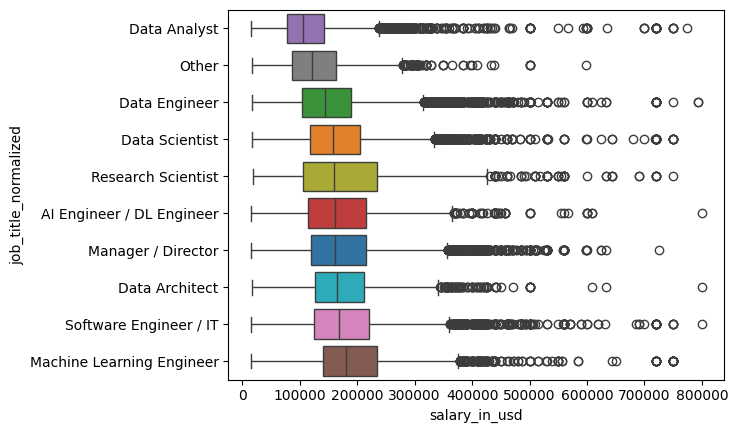

In [422]:
sns.boxplot(x = 'salary_in_usd', y = 'job_title_normalized', hue = 'job_title_normalized', data = data, order = order)

(0.0, 450000.0)

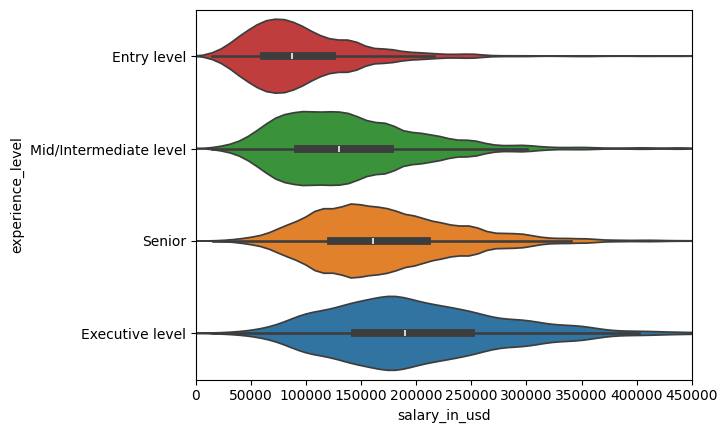

In [423]:
sns.violinplot(y = 'experience_level', x = 'salary_in_usd', data = data, hue = 'experience_level', order=['Entry level', 'Mid/Intermediate level', 'Senior', 'Executive level'])
plt.xlim([0, 450000])

<Axes: xlabel='log_salary', ylabel='experience_level'>

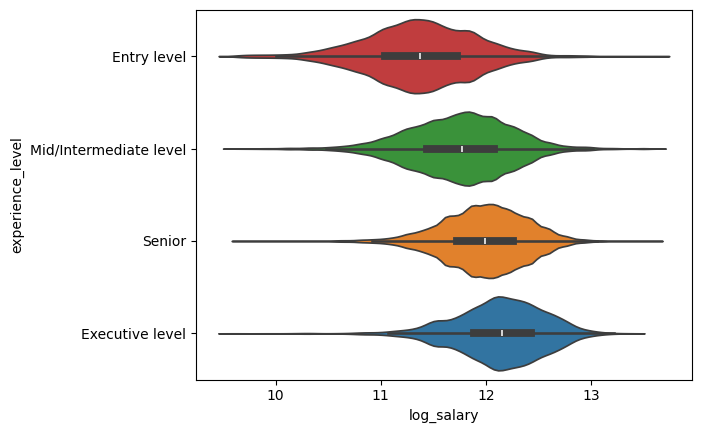

In [424]:
sns.violinplot(y = 'experience_level', x = 'log_salary', data = data, hue = 'experience_level',order=['Entry level', 'Mid/Intermediate level', 'Senior', 'Executive level'])

In [425]:
min_jobs = 30

# Show top 20 locations by median salary only including locations with at least min_jobs job listings
top_locations = data['full_company_location'].value_counts()[data['full_company_location'].value_counts() >= min_jobs].index
top_locations

Index(['United States', 'Canada', 'United Kingdom', 'Australia', 'Netherlands',
       'Germany', 'France', 'Lithuania', 'Austria', 'Spain', 'Slovak Republic',
       'India', 'Poland', 'Ireland', 'Latvia', 'Mexico', 'Brazil', 'Portugal',
       'Finland', 'New Zealand', 'South Africa', 'Philippines', 'Italy',
       'Switzerland', 'Egypt, Arab Rep.', 'Colombia', 'Singapore', 'Belgium',
       'Japan', 'Greece'],
      dtype='object', name='full_company_location')

In [445]:
median_salary_per_loc = data[data['full_company_location'].isin(top_locations)].groupby('full_company_location')['salary_in_usd'].median().sort_values(ascending=False)

<Axes: ylabel='full_company_location'>

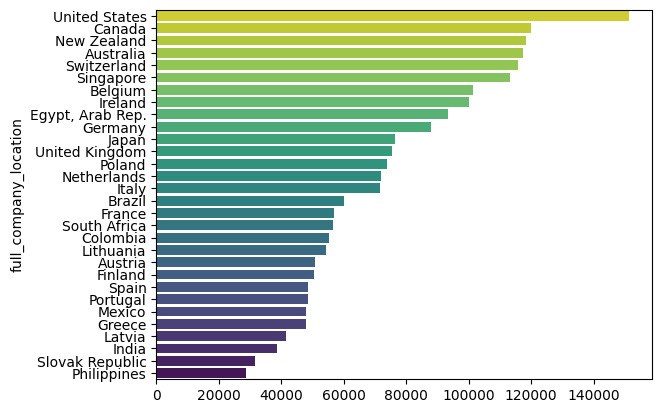

In [468]:
sns.barplot(x = median_salary_per_loc.values, y = median_salary_per_loc.index, hue = median_salary_per_loc.index, palette = 'viridis_r', legend = None)